In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import datetime
from time import sleep
from scipy.stats import linregress
import pprint as pprint
import time

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"


# Range of latitudes and longitude.
lat_range = (-90, 90)
lng_range = (-180, 180)


In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
city_count = len(cities)
city_count

617

In [3]:

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "imperial"
query_url = url + "appid=" + weather_api_key + "&units=" + unit + "&q="

# set up lists to hold reponse info
lat = []
lon =[]
temp_max = []
hum =[]
cloud=[]
wind =[]
country =[]
city_name =[]
city_num=[]

date =[]
loop=1
counter=0

# #add header to csv file
# with open(output_data_file, 'w') as csv_file:    
#     csv_file.write(f'City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed')

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lon.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        temp_max.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        city_name.append(response['name'])
        city_num.append(response['id'])
        date.append(response['dt'])
        if counter > 49:
            counter = 1
            loop += 1
            
        else:
            counter += 1
            
        print(f"City {counter} of Set {loop} | {city} ")
        time.sleep(1)#added to limit to 60 calls per minute so I can keep free api
    except Exception:
        print("City not found, next one please.")

print("The cities list is completed - time to make the DataFrame")        

City 1 of Set 1 | vaini 
City not found, next one please.
City 2 of Set 1 | nikolskoye 
City 3 of Set 1 | albany 
City 4 of Set 1 | ushuaia 
City 5 of Set 1 | cidreira 
City not found, next one please.
City 6 of Set 1 | bluff 
City 7 of Set 1 | pevek 
City 8 of Set 1 | veinticinco de mayo 
City 9 of Set 1 | kassala 
City 10 of Set 1 | hermanus 
City 11 of Set 1 | trail 
City 12 of Set 1 | rikitea 
City 13 of Set 1 | bredasdorp 
City 14 of Set 1 | ahuimanu 
City not found, next one please.
City 15 of Set 1 | los llanos de aridane 
City 16 of Set 1 | ojinaga 
City 17 of Set 1 | haines junction 
City 18 of Set 1 | laguna 
City 19 of Set 1 | sao jose do belmonte 
City 20 of Set 1 | mataura 
City 21 of Set 1 | bend 
City 22 of Set 1 | port lincoln 
City not found, next one please.
City 23 of Set 1 | buala 
City 24 of Set 1 | saint-philippe 
City 25 of Set 1 | ribeira grande 
City 26 of Set 1 | saskylakh 
City 27 of Set 1 | sao joao da barra 
City 28 of Set 1 | busselton 
City 29 of Set 1 | 

City 46 of Set 5 | namibe 
City 47 of Set 5 | dolores 
City 48 of Set 5 | lazaro cardenas 
City 49 of Set 5 | karratha 
City 50 of Set 5 | murgab 
City 1 of Set 6 | mackay 
City 2 of Set 6 | naze 
City 3 of Set 6 | san jeronimo 
City 4 of Set 6 | srivardhan 
City 5 of Set 6 | amga 
City 6 of Set 6 | tessalit 
City not found, next one please.
City 7 of Set 6 | brownsville 
City 8 of Set 6 | tondano 
City 9 of Set 6 | ajdabiya 
City 10 of Set 6 | stefan voda 
City 11 of Set 6 | moose factory 
City 12 of Set 6 | tierra blanca 
City 13 of Set 6 | longyearbyen 
City 14 of Set 6 | petropavlovsk-kamchatskiy 
City 15 of Set 6 | flinders 
City not found, next one please.
City 16 of Set 6 | gobabis 
City not found, next one please.
City 17 of Set 6 | kangly 
City 18 of Set 6 | natal 
City 19 of Set 6 | aguimes 
City 20 of Set 6 | margate 
City 21 of Set 6 | zharkent 
City 22 of Set 6 | bathsheba 
City not found, next one please.
City 23 of Set 6 | bom jesus 
City 24 of Set 6 | mayumba 
City 25 o

City not found, next one please.
City 4 of Set 11 | saint-georges 
City 5 of Set 11 | asmar 
City 6 of Set 11 | salalah 
City 7 of Set 11 | svirstroy 
City not found, next one please.
City 8 of Set 11 | bousse 
City 9 of Set 11 | kutum 
City 10 of Set 11 | hohoe 
City 11 of Set 11 | sembakung 
City 12 of Set 11 | tungor 
City 13 of Set 11 | batagay 
City 14 of Set 11 | odessa 
City 15 of Set 11 | novoasbest 
City 16 of Set 11 | opuwo 
City 17 of Set 11 | camargo 
City 18 of Set 11 | michigan city 
City 19 of Set 11 | hobyo 
City 20 of Set 11 | atar 
City 21 of Set 11 | xuanhua 
City 22 of Set 11 | wellington 
City not found, next one please.
City 23 of Set 11 | deputatskiy 
City 24 of Set 11 | buraydah 
City 25 of Set 11 | lata 
City 26 of Set 11 | buchanan 
City 27 of Set 11 | madimba 
City 28 of Set 11 | acajutla 
City 29 of Set 11 | road town 
City 30 of Set 11 | poum 
City 31 of Set 11 | wakkanai 
City 32 of Set 11 | agadez 
City 33 of Set 11 | quatre cocos 
City 34 of Set 11 | mor

In [4]:
# City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed

city_data_dict = {
    "City":city_name,
    "Cloudiness":cloud,
    "Country":country,
    "Date":date,
    "Humidity":hum,
    "Lat":lat,
    "Lng":lon,
    "Max Temp":temp_max,
    "Wind Speed":wind
}
city_data_df = pd.DataFrame(city_data_dict)
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Vaini,20,TO,1603166621,65,-21.20,-175.20,77.00,11.41
1,Nikolskoye,90,RU,1603166648,80,59.70,30.79,34.00,11.18
2,Albany,100,US,1603166649,79,42.60,-73.97,57.00,8.37
3,Ushuaia,75,AR,1603166488,89,-54.80,-68.30,35.60,34.45
4,Cidreira,1,BR,1603166651,93,-30.18,-50.21,66.69,12.17


In [5]:
city_data_df.to_csv("../output_data/cities.csv")
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Vaini,20,TO,1603166621,65,-21.20,-175.20,77.00,11.41
1,Nikolskoye,90,RU,1603166648,80,59.70,30.79,34.00,11.18
2,Albany,100,US,1603166649,79,42.60,-73.97,57.00,8.37
3,Ushuaia,75,AR,1603166488,89,-54.80,-68.30,35.60,34.45
4,Cidreira,1,BR,1603166651,93,-30.18,-50.21,66.69,12.17


# NOTE TO GRADER 

The first three maps are how I prefer to visualize, I saved them for my edification - the second set are as described in the homework

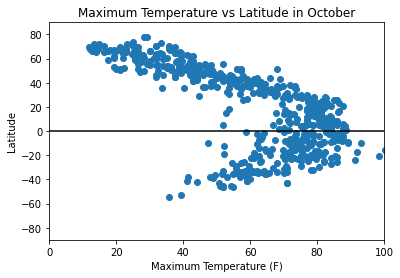

In [6]:
#Set up scatter plot for Temperature (F) vs. Latitude as I would normally plot them so the latitude aligns with maps
plt.scatter(city_data_df['Max Temp'],city_data_df['Lat'])
plt.ylabel('Latitude')
plt.hlines(0,0,100)
plt.xlabel('Maximum Temperature (F)')
plt.xlim(0,100)
plt.ylim(-90,90)
plt.title('Maximum Temperature vs Latitude in October')
plt.savefig('Maximum Temperature vs Latitude in October')
#Maximum daily temperature in October is higher near the equator, as one would suspect!

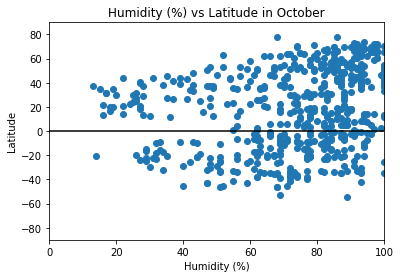

In [7]:
#Set up scatter plot for Humidity (%) vs. Latitude as I would normally plot them so the latitude aligns with maps
plt.scatter(city_data_df['Humidity'],city_data_df['Lat'])
plt.ylabel('Latitude')
plt.hlines(0,0,100)
plt.xlabel('Humidity (%)')
plt.xlim(0,100)
plt.ylim(-90,90)
plt.title('Humidity (%) vs Latitude in October')
plt.savefig('Humidity (%) vs Latitude in October')


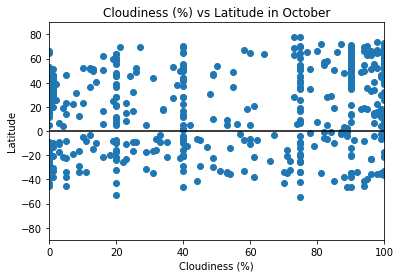

In [8]:
#Set up scatter plot for Cloudiness (%) vs. Latitude as I would normally plot them so the latitude aligns with maps
plt.scatter(city_data_df['Cloudiness'],city_data_df['Lat'])
plt.ylabel('Latitude')
plt.hlines(0,0,100)
plt.xlabel('Cloudiness (%)')
plt.xlim(0,100)
plt.ylim(-90,90)
plt.title('Cloudiness (%) vs Latitude in October')
plt.savefig('Cloudiness (%) vs Latitude in October')

# CLoudiness in October seems to be unrelated to latitude since the scatter plot shows a random pattern

# Note to grader - grade these plots for homework

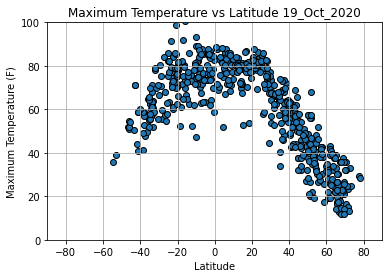

In [9]:
#Set up scatter plot for Temperature (F) vs. Latitude as shown in homework guide
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],edgecolors='black')
plt.xlabel('Latitude')
plt.grid(b=True, which='major', axis='both')
plt.ylabel('Maximum Temperature (F)')
plt.ylim(0,100)
plt.xlim(-90,90)
plt.title('Maximum Temperature vs Latitude 19_Oct_2020')
plt.savefig('Maximum Temperature vs Latitude 19_Oct_2020')
#Maximum daily temperature in October is higher near the equator, as one would suspect!
# The northern hemisphere has many more cities than the southern hemisphere, which is shown by the asymmetry of the data points
# also there are more far northern cities than far southern cities which is illustrated by the lack of datapoints south of -60 degree latitude

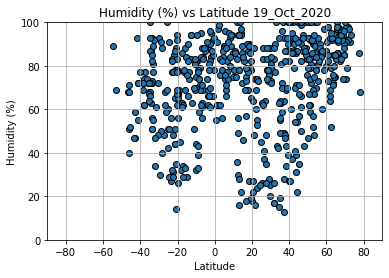

In [11]:
#Set up scatter plot for Humidity (%) vs. Latitude as shown in homework guide
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],edgecolors='black')
plt.xlabel('Latitude')
plt.grid(b=True, which='major', axis='both')
plt.ylabel('Humidity (%)')
plt.ylim(0,100)
plt.xlim(-90,90)
plt.title('Humidity (%) vs Latitude 19_Oct_2020')
plt.savefig('Humidity (%) vs Latitude 19_Oct_2020')
# Humiidty has no discernable relationship to latitude


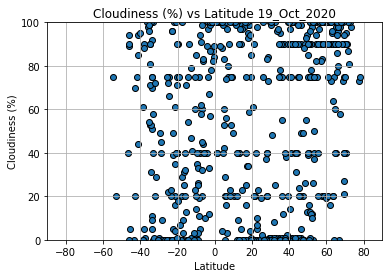

In [12]:
#Set up scatter plot for Cloudiness (%) vs. Latitude as shown in homework guide
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],edgecolors='black')
plt.xlabel('Latitude')
plt.grid(b=True, which='major', axis='both')
plt.ylabel('Cloudiness (%)')
plt.ylim(0,100)
plt.xlim(-90,90)
plt.title('Cloudiness (%) vs Latitude 19_Oct_2020')
plt.savefig('Cloudiness (%) vs Latitude 19_Oct_2020')
# Cloudiness shows no visible relationship to latitude - wind patterns and water features are more likely to affect cloud formation

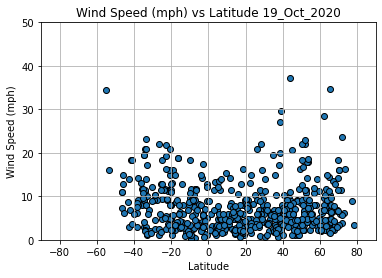

In [13]:
#Set up scatter plot for Wind Speed (mph) vs. Latitude as shown in homework guide
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],edgecolors='black')
plt.xlabel('Latitude')
plt.grid(b=True, which='major', axis='both')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0,50)
plt.xlim(-90,90)
plt.title('Wind Speed (mph) vs Latitude 19_Oct_2020')
plt.savefig('Wind Speed (mph) vs Latitude 19_Oct_2020')
#Wind speed is relatively mild across all data points at this date in October 

In [14]:
#  Set-up a northern hemisphere dataframe
north_df = city_data_df[city_data_df['Lat']>0]
north_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Nikolskoye,90,RU,1603166648,80,59.70,30.79,34.00,11.18
2,Albany,100,US,1603166649,79,42.60,-73.97,57.00,8.37
6,Pevek,21,RU,1603166494,93,69.70,170.31,26.58,14.29
8,Kassala,0,SD,1603166656,46,15.45,36.40,78.71,7.25
10,Trail,55,CA,1603166658,88,49.10,-117.70,43.00,4.52
...,...,...,...,...,...,...,...,...,...
553,Portland,75,US,1603166418,71,45.52,-122.68,57.99,5.82
554,Mazara del Vallo,0,IT,1603167268,87,37.66,12.59,55.99,6.93
555,Bay Roberts,49,CA,1603167270,94,47.60,-53.26,48.00,1.99
557,Jadu,0,LY,1603167272,88,31.95,12.03,52.92,3.71


In [15]:
#  Set-up a southern hemisphere dataframe
south_df = city_data_df[city_data_df['Lat']<0]
south_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Vaini,20,TO,1603166621,65,-21.20,-175.20,77.00,11.41
3,Ushuaia,75,AR,1603166488,89,-54.80,-68.30,35.60,34.45
4,Cidreira,1,BR,1603166651,93,-30.18,-50.21,66.69,12.17
5,Bluff,40,NZ,1603166653,68,-46.60,168.33,52.00,11.01
7,Veinticinco de Mayo,99,AR,1603166655,68,-35.43,-60.17,55.00,8.01
...,...,...,...,...,...,...,...,...,...
552,Mount Isa,40,AU,1603167266,14,-20.73,139.50,98.60,8.05
556,Ambulu,11,ID,1603167271,59,-8.35,113.61,87.49,9.10
559,Omboué,100,GA,1603167274,87,-1.57,9.26,76.78,7.09
560,Kawalu,91,ID,1603167275,62,-7.38,108.21,85.41,4.45


r value = -0.9


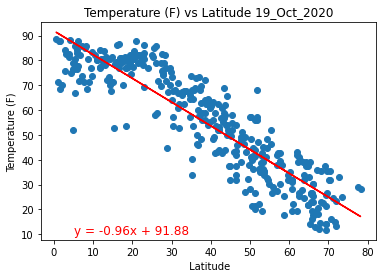

In [17]:
# Run linear regression on each relationship requested in the homework

# Add the linear regression equation and line to plot - create a function to reduce repetition
from scipy.stats import linregress

def linReg(x_values,y_values,ylabel,xloc,yloc):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.ylabel(ylabel)
    plt.xlabel(' Latitude')
    plt.annotate(line_eq,(xloc,yloc),fontsize=12,color="red")
    plt.title(f'{ylabel} vs Latitude 19_Oct_2020')
    print(f'r value = {round(rvalue, 3)}')
    plt.show()

#  set-up variables and run function for Northern Hemisphere - Temperature (F) vs. Latitude
x_values = north_df['Lat']
y_values = north_df['Max Temp']
ylabel='Temperature (F)'
xloc = 5
yloc = 10    
linReg(x_values,y_values,ylabel,xloc,yloc)

# Temperature shows a negative correlation with latitude in the northern hemisphere 
# The r value of -0.9 - is close to -1 which indicates a strong negative correlation

r value = 0.636


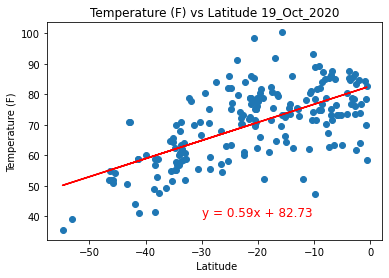

In [18]:
# Southern Hemisphere - Temperature (F) vs. Latitude
x_values = south_df['Lat']
y_values = south_df['Max Temp']
ylabel='Temperature (F)'
xloc = -30
yloc = 40 
linReg(x_values,y_values,ylabel,xloc,yloc)
# Temperature shows a positive correlation with latitude in the southern hemisphere
# The r value of 0.636  - is between 0.5 and 0.7 indicating a moderate correlation

r value = 0.256


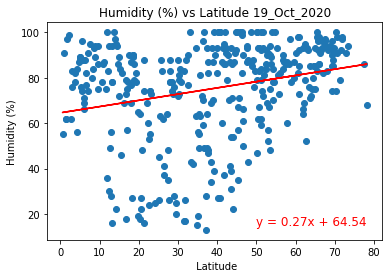

In [19]:
# Northern Hemisphere - Humidity (%) vs. Latitude
x_values = north_df['Lat']
y_values = north_df['Humidity']
ylabel='Humidity (%)'
xloc = 50
yloc = 15  
linReg(x_values,y_values,ylabel,xloc,yloc)
# Humidity shows no or very weak correlation with latitude in the southern hemisphere
# The r value of 0.256  - is less than 0.3 which indicates no or very weak correlation

r value = 0.158


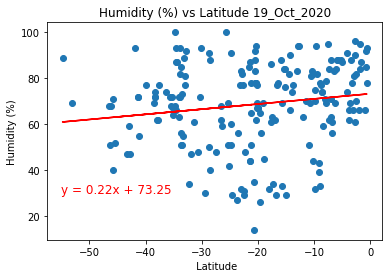

In [20]:
# Southern Hemisphere - Humidity (%) vs. Latitude
x_values = south_df['Lat']
y_values = south_df['Humidity']
ylabel='Humidity (%)'
xloc = -55
yloc = 30   
linReg(x_values,y_values,ylabel,xloc,yloc)
# Humidity shows no or very weak correlation with latitude in the southern hemisphere
# The r value of 0.158  - is less than 0.3 which indicates no or very weak correlation

r value = 0.227


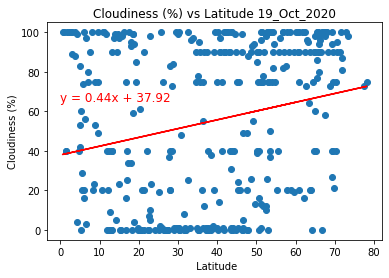

In [23]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude
x_values = north_df['Lat']
y_values = north_df['Cloudiness']
ylabel='Cloudiness (%)'
xloc = 0
yloc = 65
linReg(x_values,y_values,ylabel,xloc,yloc)
# Cloudiness shows no or very weak correlation with latitude in the northern hemisphere
# The r value of 0.227  - is less than 0.3 which indicates no or very weak correlation

r value = 0.06


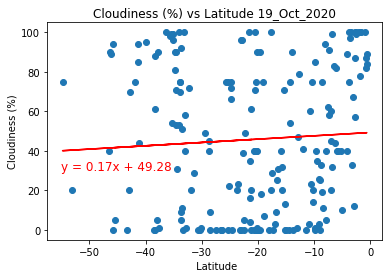

In [24]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude
x_values = south_df['Lat']
y_values = south_df['Cloudiness']
ylabel='Cloudiness (%)'
xloc = -55
yloc = 30   
linReg(x_values,y_values,ylabel,xloc,yloc)
# Cloudiness shows no correlation with latitude in the southern hemisphere
# The r value of 0.06  - is darn close to zero shows no discernable correlation 

r value = 0.164


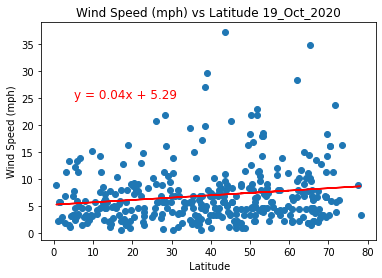

In [25]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude
x_values = north_df['Lat']
y_values = north_df['Wind Speed']
ylabel='Wind Speed (mph)'
xloc = 5
yloc = 25
linReg(x_values,y_values,ylabel,xloc,yloc)
# Wind Speed shows no or very weak correlation with latitude in the northern hemisphere
# The r value of 0.164  - is less than 0.3 which indicates no or very weak correlation

r value = -0.319


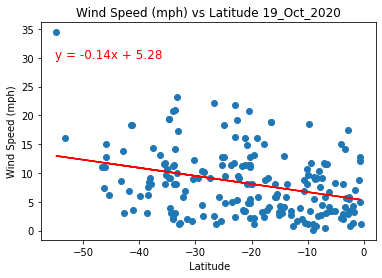

In [27]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude
x_values = south_df['Lat']
y_values = south_df['Wind Speed']
ylabel='Wind Speed (mph)'
xloc = -55
yloc = 30   
linReg(x_values,y_values,ylabel,xloc,yloc)
# Cloudiness shows weak negative correlation with latitude in the southern hemisphere
# The r value of -0.319  - is between -0.3 and -0.5 which indocates a weak negative correlation 

## This concludes part one of this exercise - please turn your attention to VacationPy